# Sixt Data Science Lab - Test Task for Data Scientist Job Candidates

## Introduction

In this test task you will have an opportunity to demonstrate your skills of a Data Scientist from various angles - processing data, analyzing and vizalizing it, finding insights, applying predictive techniques and explaining your reasoning about it.

The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].

Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**
1. Prepare a Python 3 virtual environment (with virtualenv command). requirements.txt output of pip freeze command should be included as part of your submission.
2. Load the data from UCI Repository and put it into the same folder with the notebook. The link to it is https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset . Here is an available mirror in case the above website is down: https://data.world/uci/bike-sharing-dataset
3. We split the data into two parts. One dataset containing the last 30 days and one dataset with the rest.

### Terminal commands to start the project

In [1]:
!python -m venv .venv

Error: [Errno 13] Permission denied: 'c:\\Users\\lpaes\\projects\\test\\.venv\\Scripts\\python.exe'


In [2]:
!.\.venv\Scripts\activate

In [3]:
!pip install -r requirements.txt

You should consider upgrading via the 'c:\users\lpaes\projects\test\.venv\scripts\python.exe -m pip install --upgrade pip' command.


### Imports

In [4]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

%matplotlib inline

#### Data Load

In [5]:
import requests

# URL to download the dataset from the UCI Repository
uci_url = "https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset"
# Send an HTTP request to the chosen URL
response = requests.get(uci_url)
if response.status_code == 200:
    with open("./data/bike-sharing-dataset.zip", "wb") as file:
        file.write(response.content)


In [6]:
# Open the ZIP file
zip_file_path = "data/bike+sharing+dataset.zip"
files_to_extract = ["day.csv", "hour.csv", "Readme"]

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./data')


In [7]:
# read raw data
df_all = pd.read_csv('day.csv')

# split dataset
df_last30 = df_all.tail(30)
df = df_all.iloc[:-30, :]

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
df.shape, df_all.shape

((701, 16), (731, 16))

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Part 2 - Data Processing and Analysis

**Tasks:**
1. Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. Visualise rentals of bikes per day.
3. Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [11]:
del(df['dteday'])

#Numerical and categorical features
cat_cols = ['season','yr','mnth','holiday','weekday','weathersit','workingday', ]
num_cols = list(set(df.columns)-set(cat_cols))

In [12]:
df[num_cols].describe()

,registered,atemp,temp,casual,hum,cnt,instant,windspeed
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,3661.104137,0.480847,0.502732,866.937233,0.625717,4528.041369,351.000000,0.190534
std,1553.467783,0.162584,0.182781,693.470674,0.141988,1939.766889,202.505555,0.076740
min,20.000000,0.079070,0.059130,2.000000,0.000000,22.000000,1.000000,0.022392
25%,2507.000000,0.348470,0.343478,317.000000,0.519167,3194.000000,176.000000,0.134958
50%,3656.000000,0.503146,0.514167,738.000000,0.623750,4541.000000,351.000000,0.182221
75%,4739.000000,0.613025,0.660000,1135.000000,0.728750,6041.000000,526.000000,0.233221
max,6946.000000,0.840896,0.861667,3410.000000,0.972500,8714.000000,701.000000,0.507463


In [13]:
# convert the cal_cols to a categorical datatype
for col in cat_cols:
    df[col] = df[col].astype('string') 
    df[col] = df[col].astype('category') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     701 non-null    int64   
 1   season      701 non-null    category
 2   yr          701 non-null    category
 3   mnth        701 non-null    category
 4   holiday     701 non-null    category
 5   weekday     701 non-null    category
 6   workingday  701 non-null    category
 7   weathersit  701 non-null    category
 8   temp        701 non-null    float64 
 9   atemp       701 non-null    float64 
 10  hum         701 non-null    float64 
 11  windspeed   701 non-null    float64 
 12  casual      701 non-null    int64   
 13  registered  701 non-null    int64   
 14  cnt         701 non-null    int64   
dtypes: category(7), float64(4), int64(4)
memory usage: 50.2 KB


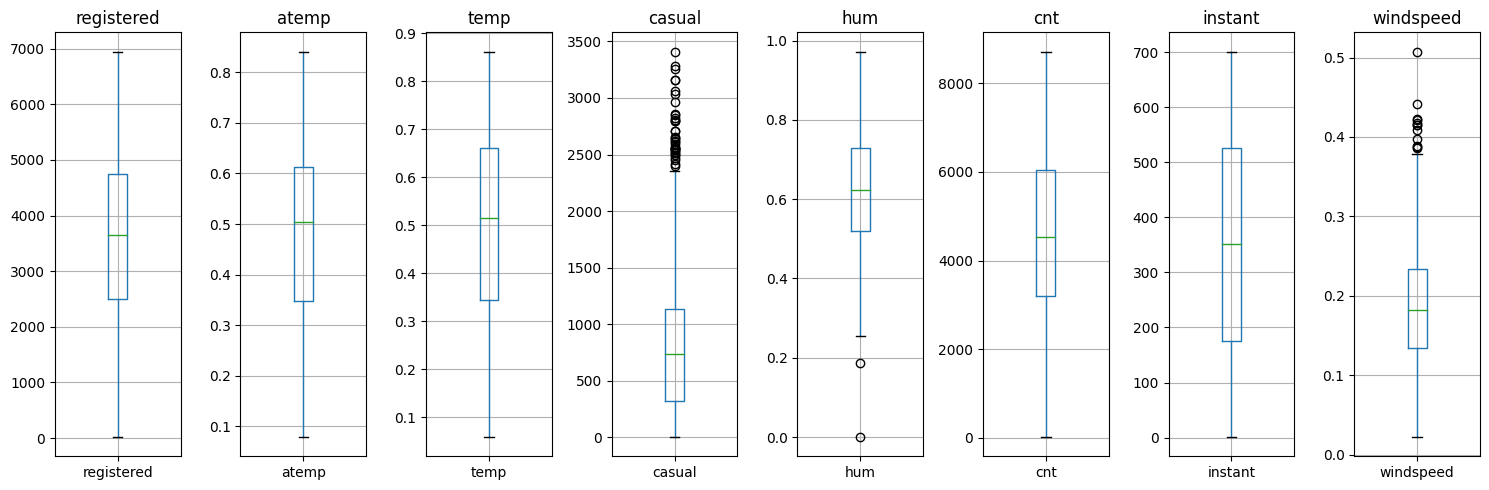

In [15]:
# Distribution over the numerical features

num_cols_count = len(num_cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(15, 5))  # Create subplots

# Iterate through numerical columns and create box plots in subplots
for i, column in enumerate(num_cols):
    df.boxplot(column=column, vert=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

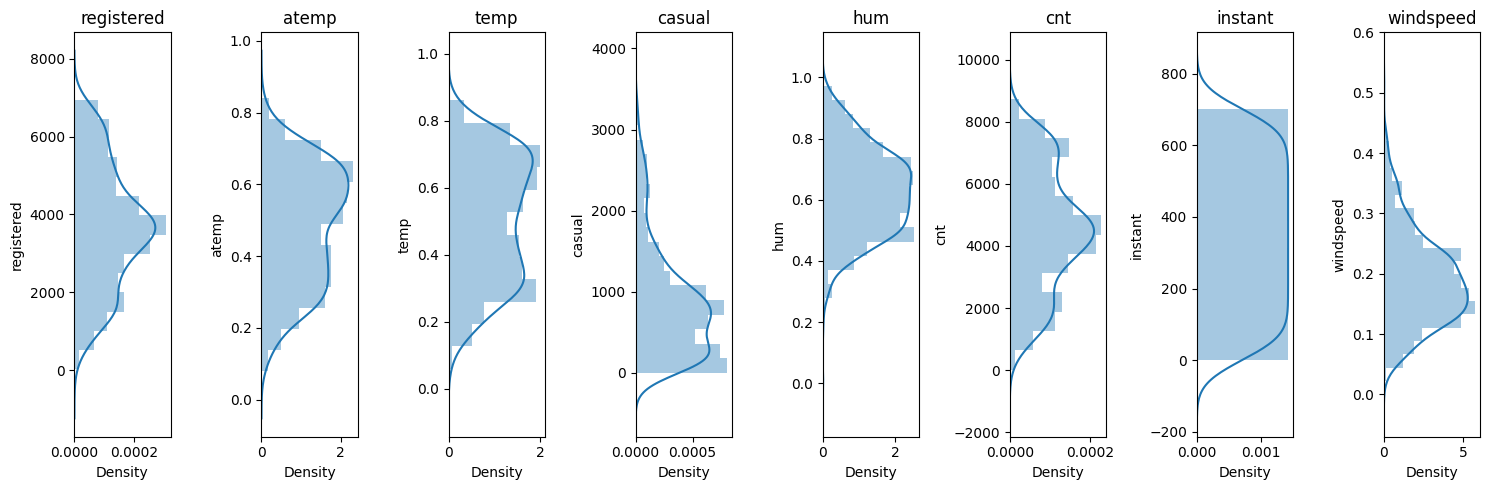

In [16]:
# Analise the numerical deature distribution 
# Check if is a normal distribution 

num_cols_count = len(num_cols)
fig, axes = plt.subplots(1, num_cols_count, figsize=(15, 5))  # Create subplots

# Iterate through numerical columns and create box plots in subplots
for i, column in enumerate(num_cols):
    sns.distplot(df[column], vertical=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

###  Visualization Of Variables Categorical (DataType) Count

In [17]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'workingday']

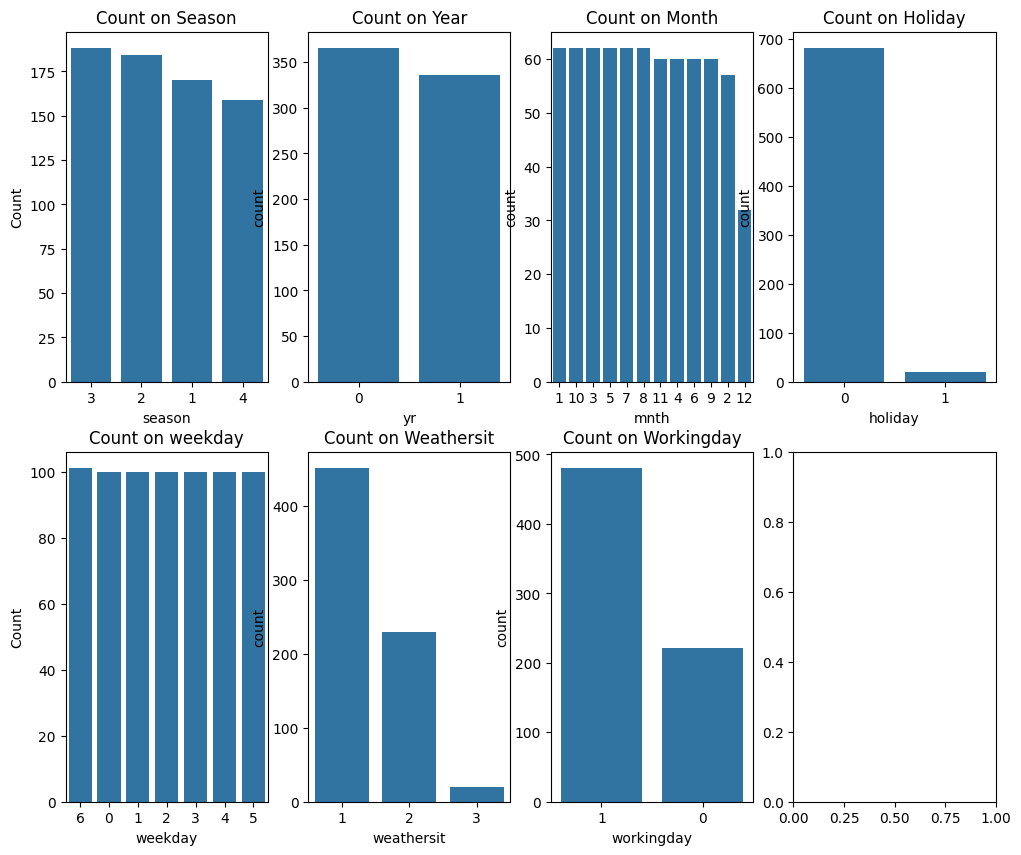

In [18]:
def plot_datetime_data_distribution(df):

    fig, axes = plt.subplots(nrows=2,ncols=4)
    fig.set_size_inches(12, 10)
    sns.countplot(data=df,x="season",order=df['season'].value_counts().index,orient="v",ax=axes[0][0])
    sns.countplot(data=df,x="yr",order=df['yr'].value_counts().index,orient="v",ax=axes[0][1])
    sns.countplot(data=df,x="mnth",order=df['mnth'].value_counts().index,orient="v",ax=axes[0][2])
    sns.countplot(data=df,x="holiday",order=df['holiday'].value_counts().index,orient="v",ax=axes[0][3])
    sns.countplot(data=df,x="weekday",order=df['weekday'].value_counts().index,orient="v",ax=axes[1][0])
    sns.countplot(data=df,x="weathersit",order=df['weathersit'].value_counts().index,orient="v",ax=axes[1][1])
    sns.countplot(data=df,x="workingday",order=df['workingday'].value_counts().index,orient="v",ax=axes[1][2])

  

    axes[0][0].set(ylabel='Count',title="Count on Season")
    axes[0][1].set(title="Count on Year")
    axes[0][2].set(title="Count on Month")
    axes[0][3].set(title="Count on Holiday")
    axes[1][0].set(ylabel='Count',title="Count on weekday")
    axes[1][1].set(title="Count on Weathersit")
    axes[1][2].set(title="Count on Workingday")
   

plot_datetime_data_distribution(df)

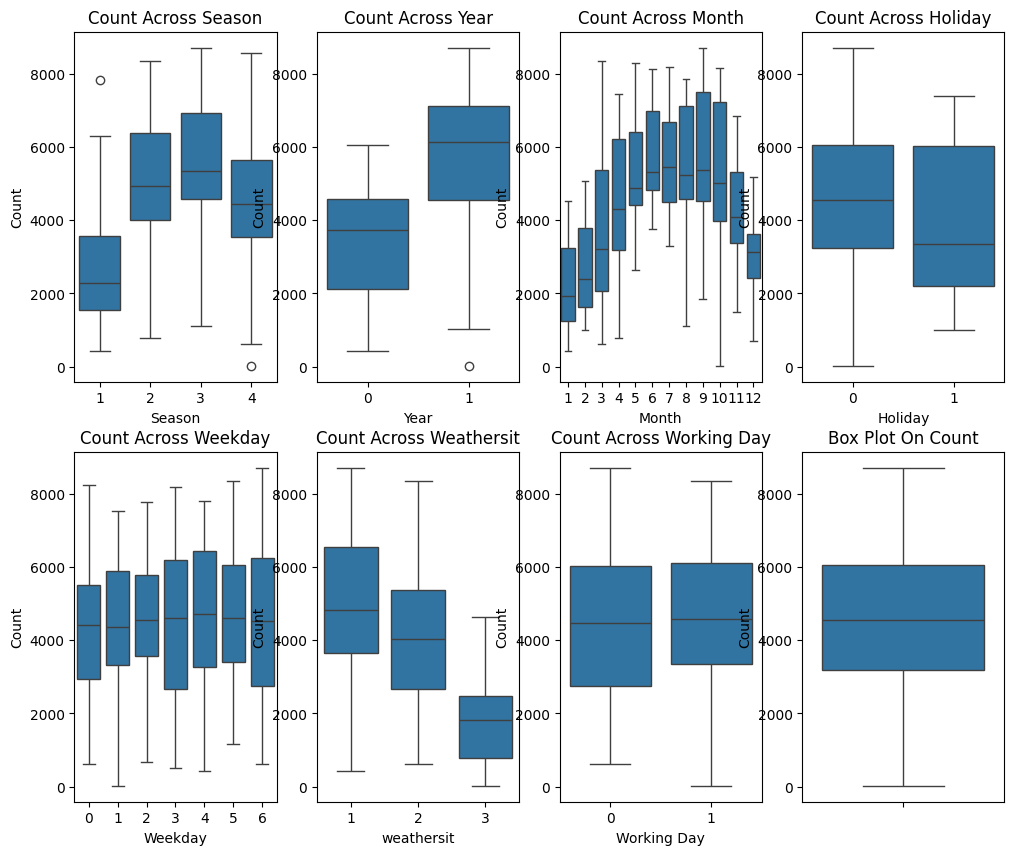

In [19]:
def plot_datetime_data_distribution(df):

    fig, axes = plt.subplots(nrows=2,ncols=4)
    fig.set_size_inches(12, 10)
    
    sns.boxplot(data=df,y="cnt",x="season",orient="v",ax=axes[0][0])
    sns.boxplot(data=df,y="cnt",x="yr",orient="v",ax=axes[0][1])
    sns.boxplot(data=df,y="cnt",x="mnth",orient="v",ax=axes[0][2], order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    sns.boxplot(data=df,y="cnt",x="holiday",orient="v",ax=axes[0][3])
    sns.boxplot(data=df,y="cnt",x="weekday",orient="v",ax=axes[1][0])
    sns.boxplot(data=df,y="cnt",x="weathersit",orient="v",ax=axes[1][1])
    sns.boxplot(data=df,y="cnt",x="workingday",orient="v",ax=axes[1][2])
    sns.boxplot(data=df,y="cnt",orient="v",ax=axes[1][3])

    
    axes[0][0].set(xlabel='Season', ylabel='Count',title="Count Across Season")
    axes[0][1].set(xlabel='Year', ylabel='Count',title="Count Across Year")
    axes[0][2].set(xlabel='Month', ylabel='Count',title="Count Across Month")
    axes[0][3].set(xlabel='Holiday', ylabel='Count',title="Count Across Holiday")
    axes[1][0].set(xlabel='Weekday', ylabel='Count',title="Count Across Weekday")
    axes[1][1].set(xlabel='weathersit', ylabel='Count',title="Count Across Weathersit")
    axes[1][2].set(xlabel='Working Day', ylabel='Count',title="Count Across Working Day")
    axes[1][3].set(ylabel='Count',title="Box Plot On Count")

plot_datetime_data_distribution(df)

# Data Analysis discussion

At a frist look on the Categorical variables do not contains ouliers.But in addition to that, following inferences can also been made from the simple boxplots given below.
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
    *   Spring season (1) has got a relative lower count. That is showed by the lower median value on boxplot.

- mnth : month ( 1 to 12)
    *   during the months 5,6,7,8,9 there are higer number of rents. Making sence with the season information.
        Been the moths that represents 2:summer, 3:fall
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds,
    *   The weather situation demonstrates a correlation with the season and month, aligning with their respective      patterns.

- yr : year (0: 2011, 1:2012)
    *   There is a significant increase of from 2011 to 2012
    
- weekday and workingday
    *    week days do not show diferences on the boxplot median

    

### Coorelation Analysis over the Numerical features

In [20]:
num_cols

['registered', 'atemp', 'temp', 'casual', 'hum', 'cnt', 'instant', 'windspeed']

<Axes: >

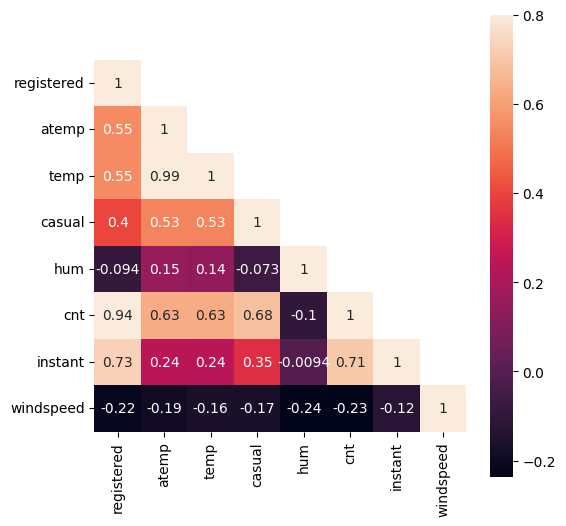

In [21]:
coor_matrix = df[num_cols].corr()
mask = np.array(coor_matrix)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(coor_matrix, mask=mask,vmax=.8, square=True,annot=True)

# Coorelation Analysis discussion

Lets plot a correlation plot between cnt and atemp, windspeed, temp, humidity.

*   The atemp and temp showed the strong positive coorelation with the CNT feature. That coroborates with season data.

*   The variable "atemp" shows a strong correlation with "temp". Due that when constructing the model, one of these variables must be removed to address the issue of multicollinearity in the dataset.

*   The "Casual" and "Registered" should be excluded since they are componets that build the CNT feature. They are inherently leaky variables, and therefore, they need to be removed when constructing the model.

shoud taken into account since they are leakage variables in nature and need to dropped during model building.


<Axes: xlabel='cnt', ylabel='Density'>

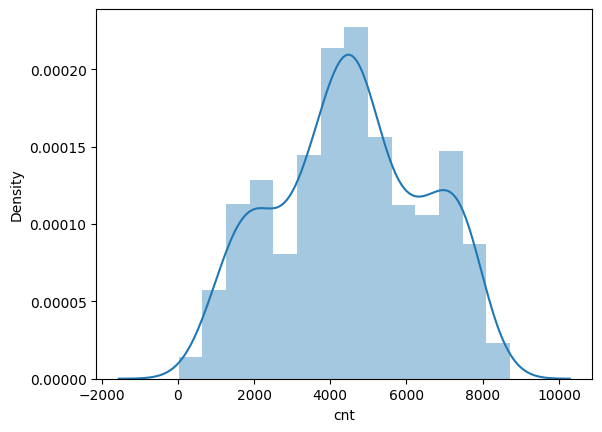

In [22]:
sns.distplot(df["cnt"])

#### Find the maximum number of bicycles `nmax` that was needed in any one day.

In [23]:
data = df_all.copy()
nmax = data.cnt.max()
nmax

8714

In [24]:
data.query("cnt == 8714")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [25]:
df_all.query("instant == 624")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


#### Find the 95%-percentile of bicycles `n95` that was needed in any one day.

In [26]:
n95 = np.percentile(data['cnt'], 95)
n95

7576.0

#### 5.  Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)

#### 5.  Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)

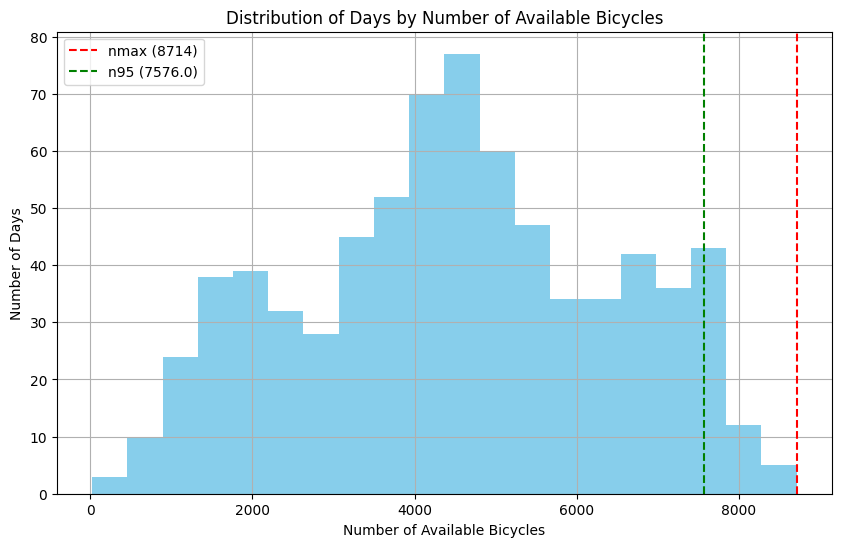

In [27]:
# Plot the distribution of days based on the number of needed bicycles
data_plot = data[['dteday','cnt']]
data_plot['dteday'] = pd.to_datetime(data_plot['dteday'])

plt.figure(figsize=(10, 6))
plt.hist(data_plot['cnt'], bins=20, color='skyblue')
plt.axvline(nmax, color='red', linestyle='--', label=f'nmax ({nmax})')
plt.axvline(n95, color='green', linestyle='--', label=f'n95 ({n95})')
plt.xlabel("Number of Available Bicycles")
plt.ylabel("Number of Days")
plt.title("Distribution of Days by Number of Available Bicycles")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
len(data['dteday'][data['cnt'] > n95])

37

In [29]:
np.maximum(data['cnt'] - n95, 0).sum()

12161.0

**Answers / comments / reasoning:**

* Find the maximum number of bicycles `nmax` that was needed in any one day.
    *  **nmax = 8714 in 2012-09-15**

* Find the 95%-percentile of bicycles `n95` that was needed in any one day.
    * **n95 =7576**  
    * This means that on 95% of the days, the bike rental demand is lower than or equal to 7576 bikes. It's gives you an idea of the peak demand.
    +

* During 37 days the demand of bike rental was highr than n95, that represent a 12.161 retals that a higher tha the n95.


## Part 3 - Building prediction models

**Tasks:**
1. Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. Report the value of the chosen test metric on the provided data. 

In [30]:
#model selection
import joblib
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import ( mean_squared_log_error, 
                             mean_absolute_error, mean_squared_error, r2_score)

In [31]:
# TODO: your code comes here
df_to_split = df.drop(columns=['instant','casual','registered'])
df.loc[:, 'log_cnt'] = np.log(df['cnt']).values
df_to_split.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [32]:
x_train,x_test,y_train,y_test=train_test_split(df_to_split.drop('cnt',axis=1),df['cnt']
                                               ,test_size=0.20,
                                               random_state=42)

In [33]:
train_dicts = x_train.to_dict(orient='records')
train_dicts[0]

{'season': '2',
 'yr': '0',
 'mnth': '6',
 'holiday': '0',
 'weekday': '3',
 'workingday': '1',
 'weathersit': '1',
 'temp': 0.626667,
 'atemp': 0.587754,
 'hum': 0.471667,
 'windspeed': 0.167912}

In [34]:
#TODO Use a pipeline od a dv
dv =DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


In [35]:
dv.get_feature_names_out()

array(['atemp', 'holiday=0', 'holiday=1', 'hum', 'mnth=1', 'mnth=10',
       'mnth=11', 'mnth=12', 'mnth=2', 'mnth=3', 'mnth=4', 'mnth=5',
       'mnth=6', 'mnth=7', 'mnth=8', 'mnth=9', 'season=1', 'season=2',
       'season=3', 'season=4', 'temp', 'weathersit=1', 'weathersit=2',
       'weathersit=3', 'weekday=0', 'weekday=1', 'weekday=2', 'weekday=3',
       'weekday=4', 'weekday=5', 'weekday=6', 'windspeed', 'workingday=0',
       'workingday=1', 'yr=0', 'yr=1'], dtype=object)

### Base lien model instance

In [36]:
model = RandomForestRegressor(random_state=9)
model.fit(X_train, y_train)

joblib.dump(model, 'model_BASE_LINE.plk')

y_pred = model.predict(X_train)

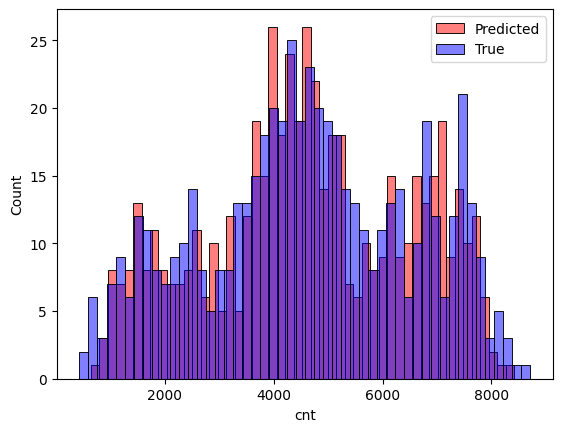

In [37]:
def plot_true_vs_prediction(y_prediction, y_true):
    sns.histplot(y_prediction, color='red', bins=50, alpha=0.5, label='Predicted')
    sns.histplot(y_true, color='blue', bins=50, alpha=0.5, label='True')

    plt.legend()
    plt.show()

plot_true_vs_prediction(y_prediction=y_pred, y_true=y_train)

In [38]:
def model_evaluation(y_true, y_prediction):

        # Calculate and print various evaluation metrics
        mae = mean_absolute_error(y_true, y_prediction)
        mse = mean_squared_error(y_true, y_prediction)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_prediction)
        mape = np.mean(np.abs((y_true - y_prediction) / y_true)) * 100
        rmsle = np.sqrt(mean_squared_log_error(y_true, y_prediction))


        result_dict = {

            # Print the evaluation metrics
            "mae": mae.round(2),
            "mse": mse.round(2),
            "rmse": rmse.round(2),
            "rmsle":rmsle.round(2),
            "r2": r2.round(2),
            "mape": mape.round(2),
            
        }

        return result_dict

model_evaluation(y_train, y_pred)

{'mae': 175.07,
 'mse': 64830.19,
 'rmse': 254.62,
 'rmsle': 0.11,
 'r2': 0.98,
 'mape': 5.92}

## Validation base line model

In [39]:
# Prepare the test data
test_dicts = x_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred = model.predict(X_test)
type(y_test),type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

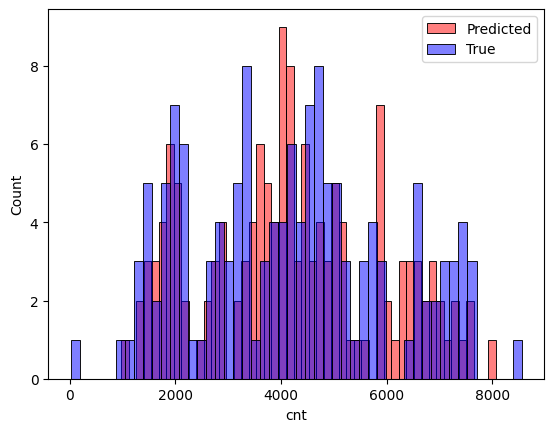

In [40]:
plot_true_vs_prediction(y_prediction=y_pred, y_true=y_test)

In [41]:
model_evaluation(y_test, y_pred)

{'mae': 518.24,
 'mse': 633965.49,
 'rmse': 796.22,
 'rmsle': 0.49,
 'r2': 0.82,
 'mape': 151.22}

# Model Numerical fetures

In [42]:
df_to_split_num = df[['windspeed',	'temp',	'hum', 'log_cnt']]
df_to_split_num.head(3)

,windspeed,temp,hum,log_cnt
0,0.160446,0.344167,0.805833,6.892642
1,0.248539,0.363478,0.696087,6.685861
2,0.248309,0.196364,0.437273,7.207119


In [43]:
x_train,x_test,y_train,y_test=train_test_split(df_to_split_num.drop('log_cnt',axis=1),df['log_cnt']
                                               ,test_size=0.20,
                                               random_state=42)
train_dicts = x_train.to_dict(orient='records')
train_dicts[0]

{'windspeed': 0.167912, 'temp': 0.626667, 'hum': 0.471667}

In [44]:
dv =DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
# Prepare the test data
test_dicts = x_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

#MODEL
model_num = RandomForestRegressor(random_state=9)
model_num.fit(X_train, y_train)

RandomForestRegressor(random_state=9)

In [45]:
y_pred = model_num.predict(X_train)
model_evaluation(y_train, y_pred)

{'mae': 0.1, 'mse': 0.02, 'rmse': 0.13, 'rmsle': 0.02, 'r2': 0.94, 'mape': 1.2}

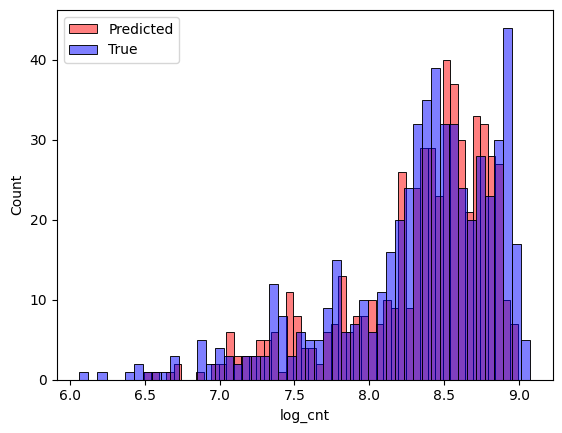

In [46]:
plot_true_vs_prediction(y_prediction=y_pred, y_true=y_train)

# Included Categorical Features

In [47]:
df_to_split_num_cat = df[['mnth', 'weathersit', 'windspeed',
                          'temp',	'hum', 'log_cnt']]

df_to_split_num_cat.head(3)

,mnth,weathersit,windspeed,temp,hum,log_cnt
0,1,2,0.160446,0.344167,0.805833,6.892642
1,1,2,0.248539,0.363478,0.696087,6.685861
2,1,1,0.248309,0.196364,0.437273,7.207119


In [48]:
x_train,x_test,y_train,y_test=train_test_split(df_to_split_num_cat.drop('log_cnt',axis=1),df['log_cnt']
                                               ,test_size=0.20,
                                               random_state=42)
train_dicts = x_train.to_dict(orient='records')
train_dicts[0]

{'mnth': '6',
 'weathersit': '1',
 'windspeed': 0.167912,
 'temp': 0.626667,
 'hum': 0.471667}

In [49]:
dv =DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
# Prepare the test data
test_dicts = x_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

#MODEL
model_num_cat = RandomForestRegressor(random_state=9)
model_num_cat.fit(X_train, y_train)

RandomForestRegressor(random_state=9)

In [50]:
y_pred = model_num_cat.predict(X_train)
model_evaluation(y_train, y_pred)

{'mae': 0.1,
 'mse': 0.02,
 'rmse': 0.13,
 'rmsle': 0.01,
 'r2': 0.95,
 'mape': 1.19}

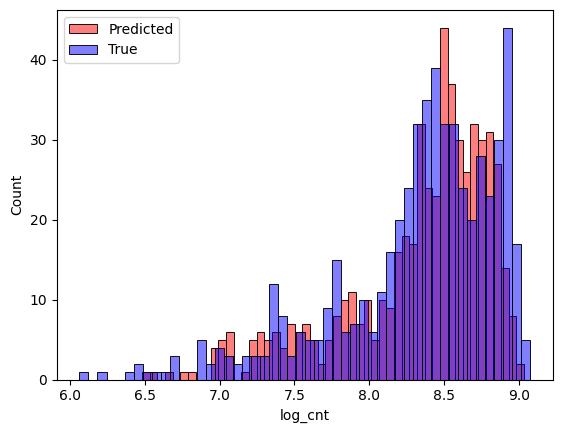

In [51]:
plot_true_vs_prediction(y_prediction=y_pred, y_true=y_train)

### Validation model numerical + categorical features 

In [52]:
y_pred = model_num_cat.predict(X_test)
model_evaluation(y_test, y_pred)

{'mae': 0.28,
 'mse': 0.27,
 'rmse': 0.52,
 'rmsle': 0.07,
 'r2': 0.38,
 'mape': 4.18}

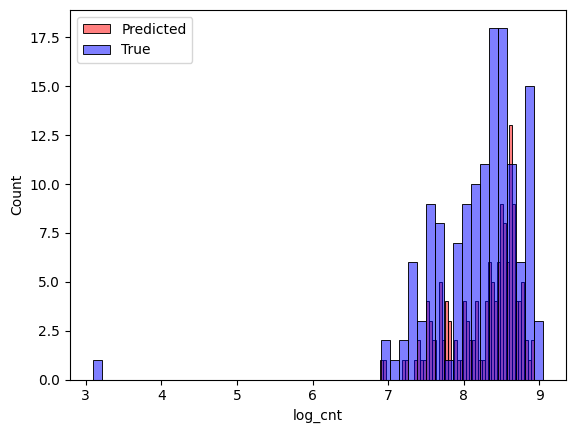

In [53]:
plot_true_vs_prediction(y_prediction=y_pred, y_true=y_test)

### Grid search

#### Save data to model

In [54]:
data_to_model = df[['mnth', 'weathersit', 'windspeed',
                          'temp',	'hum', 'log_cnt']]

data_to_model.to_csv('data_to_model.csv')

In [55]:
x_train,x_test,y_train,y_test=train_test_split(data_to_model.drop('log_cnt',axis=1),df['log_cnt']
                                               ,test_size=0.20,
                                               random_state=42)

# OneHot encoding the input data
dv = DictVectorizer(sparse=False)

train_dicts = x_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

test_dicts = x_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

#MODEL
model_num_cat = RandomForestRegressor(random_state=9)
model_num_cat.fit(X_train, y_train)

RandomForestRegressor(random_state=9)

#### -> n_estimators
Defines the number of decision trees (estimators) to be included in the ensemble


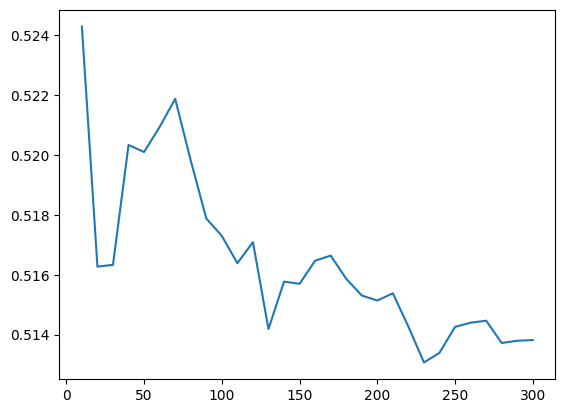

In [56]:
scores = []
for n in range(10, 301, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=9)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    # rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    # scores.append((n,rmsle))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append((n,rmse))
    
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
plt.plot(df_scores['n_estimators'], df_scores['rmse'])

#### -> max_depth

This restricts the trees from growing too deep and helps prevent overfitting.

In [57]:
scores = []

for d in [3, 4, 5, 10]:
    for n in range(100, 250, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d, 
                                   random_state=9)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_test)
        # rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
        # scores.append((d, n, rmsle))

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append((d, n, rmse))
    
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])

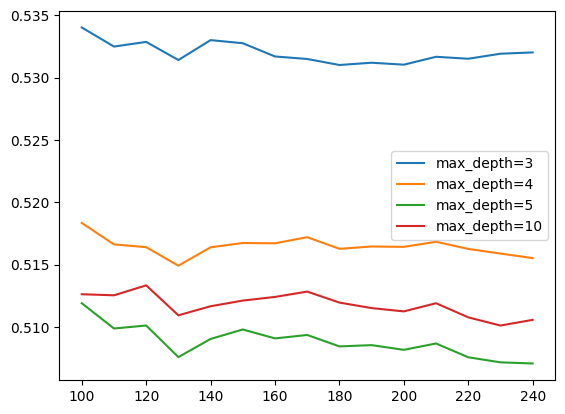

In [58]:
for d in [3, 4, 5, 10]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset['rmse'],
             label='max_depth=%d' % d)

plt.legend()

### -> min_samples_leaf 

the minimum number of samples required to be at a leaf node. This makes the trees more "shallow" and prevents overfitting

In [59]:
scores = []
max_depth = 30

for s in [1, 3, 5, 10]:
    for n in range(100, 250, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_test)
        # rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
        # scores.append((s, n, rmsle))
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        scores.append((s,n,rmse)) 

columns = ['min_samples_leaf', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

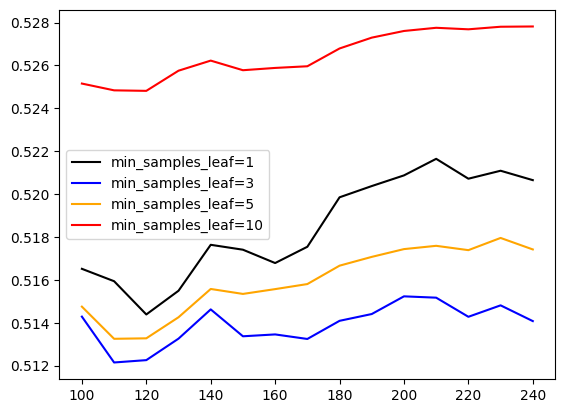

In [60]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores['min_samples_leaf'] == s]
    
    plt.plot(df_subset['n_estimators'], df_subset['rmse'],
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

# GridSearchCV

In [61]:
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore", category=UserWarning)

params_dict={'n_estimators':[30, 170, 200, 230, 250],
             'max_depth': [4, 5, 6,],
             'min_samples_leaf': [3, 4, 5],
             'n_jobs':[-1],
             'max_features':["auto",'sqrt','log2']}

grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=9),
                        param_grid = params_dict,
                        scoring = 'neg_root_mean_squared_error',
                        cv=3)

grid_search.fit(X_train,y_train)
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'n_estimators': 30,
 'n_jobs': -1}

In [62]:
GSCVREsults = pd.DataFrame(grid_search.cv_results_)
GSCVREsults.head(3).sort_values(by=['mean_test_score'], ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000613,0.000438,0.0,0.0,4,auto,3,30,-1,"{'max_depth': 4, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,91
1,0.000596,0.000465,0.0,0.0,4,auto,3,170,-1,"{'max_depth': 4, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,91
2,0.000684,0.000967,0.0,0.0,4,auto,3,200,-1,"{'max_depth': 4, 'max_features': 'auto', 'min_...",NaN,NaN,NaN,NaN,NaN,91


In [63]:
pred = grid_search.predict(X_test)
model_evaluation(y_test, pred)

{'mae': 0.29,
 'mse': 0.24,
 'rmse': 0.49,
 'rmsle': 0.07,
 'r2': 0.44,
 'mape': 4.2}

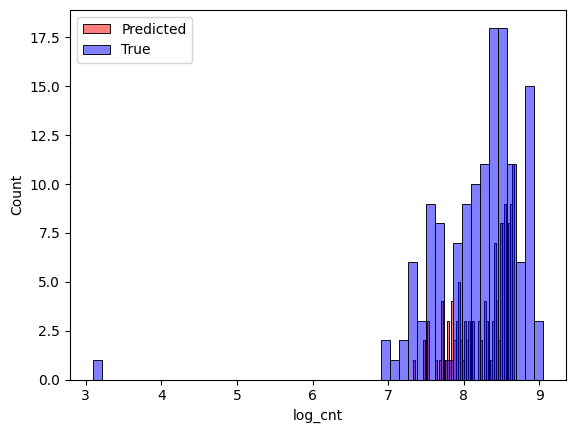

In [64]:
plot_true_vs_prediction(y_prediction=pred, y_true=y_test)

### Train a final model with bestparams

In [65]:
df_final_model = df[['mnth', 'weathersit', 'windspeed',	'temp',	'hum', 'log_cnt']]
df_final_model.head(3)

,mnth,weathersit,windspeed,temp,hum,log_cnt
0,1,2,0.160446,0.344167,0.805833,6.892642
1,1,2,0.248539,0.363478,0.696087,6.685861
2,1,1,0.248309,0.196364,0.437273,7.207119


In [66]:
x_train,x_test,y_train,y_test=train_test_split(df_final_model.drop('log_cnt',axis=1),df['log_cnt']
                                               ,test_size=0.20,
                                               random_state=42)
train_dicts = x_train.to_dict(orient='records')

In [67]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
# Prepare the test data
test_dicts = x_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

#Best params 
params = grid_search.best_params_
# params = {'max_depth': 6,
            # 'max_features': 'sqrt',
            # 'min_samples_leaf': 3,
            # 'n_estimators': 30,
            # 'n_jobs': -1}

#MODEL
model_final= RandomForestRegressor(**params, random_state=9)
model_final.fit(X_train, y_train)

# Create a dictionary to store the model and preprocessing steps
model_and_preprocessing = {
    'model': model_final,
    'label_encoder': dv  # Add other preprocessing steps as needed
}

# Save the dictionary to a file
filename = 'model_and_preprocessing_final.pkl'
joblib.dump(model_and_preprocessing, filename)

['model_and_preprocessing_final.pkl']

#### Geting the metrics fo the final taning

In [68]:
y_pred_train = model_final.predict(X_train)
model_evaluation(y_train, y_pred_train)

{'mae': 0.24,
 'mse': 0.09,
 'rmse': 0.3,
 'rmsle': 0.03,
 'r2': 0.71,
 'mape': 3.03}

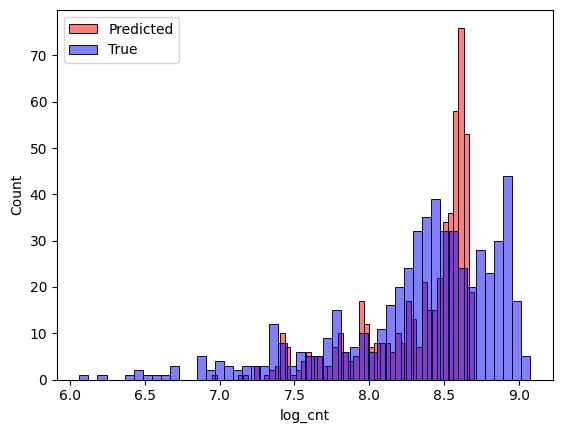

In [69]:
plot_true_vs_prediction(y_prediction=y_pred_train, y_true=y_train)

## Validadion final model

In [70]:
y_pred = model_final.predict(X_test)
model_evaluation(y_test, pred)

{'mae': 0.29,
 'mse': 0.24,
 'rmse': 0.49,
 'rmsle': 0.07,
 'r2': 0.44,
 'mape': 4.2}

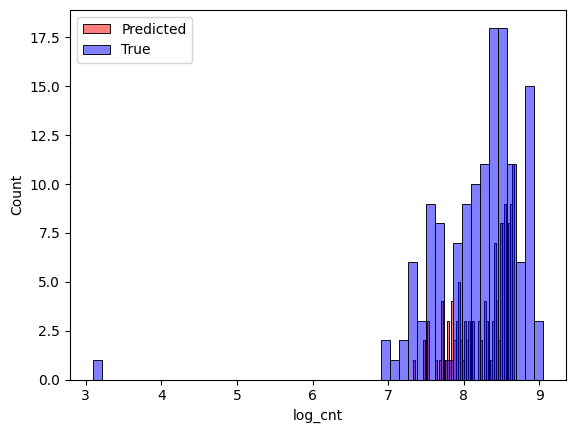

In [71]:
plot_true_vs_prediction(y_prediction=y_pred, y_true=y_test)

In [72]:
def plot_regression_resulst(y_true, y_pred):
    # Calculate confidence intervals for predictions
    residuals = y_true - y_pred
    confidence = 1.96 * np.std(residuals)  # A 95% confidence interval

    # Scatter plot of true vs. predicted values
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("True vs. Predicted Values")

    # Add a 45-degree line for reference (perfect predictions)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red', linewidth=2)
    
    # Add the confidence interval as a shaded region
    plt.fill_between([min(y_true), max(y_true)], [min(y_true) - confidence, max(y_true) - confidence], 
                    [min(y_true) + confidence, max(y_true) + confidence], color='gray', alpha=0.3)

    plt.show()


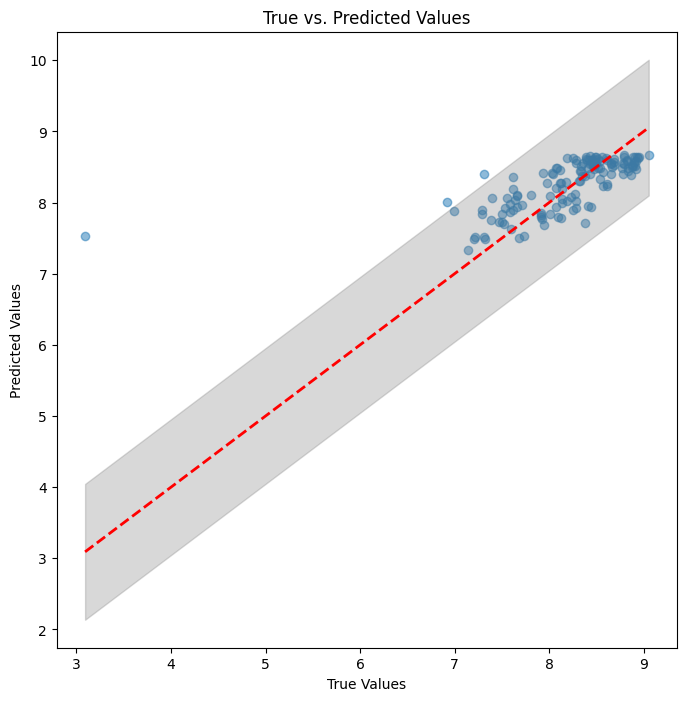

In [73]:
# Scatter plot of true vs. predicted | values in a Log scale 
plot_regression_resulst(y_true=y_test, y_pred=y_pred)

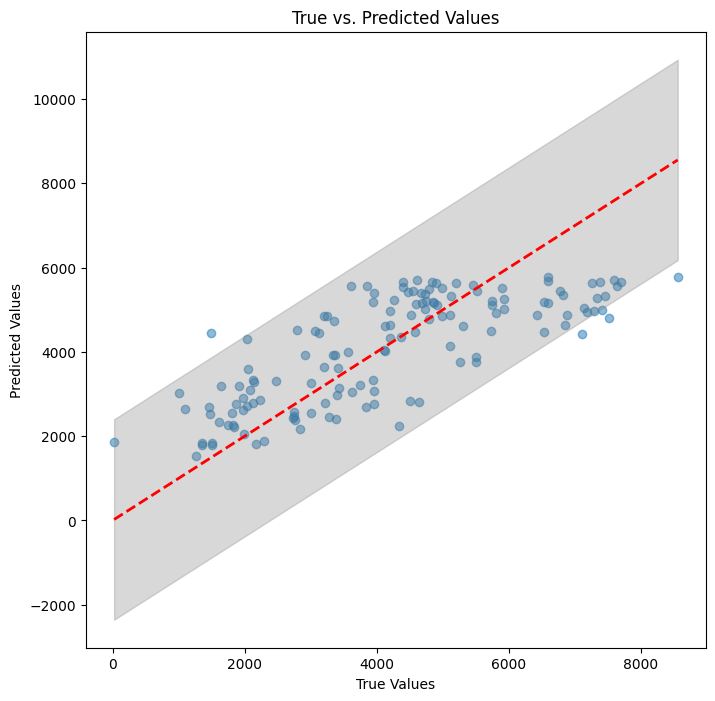

In [74]:
# Vizualizing the Original values
y_true_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)
plot_regression_resulst(y_true=y_true_exp, y_pred=y_pred_exp)

In [75]:
!pip freeze > requirements.txt

In [126]:
df_final_model.head()

,mnth,weathersit,windspeed,temp,hum,log_cnt
0,1,2,0.160446,0.344167,0.805833,6.892642
1,1,2,0.248539,0.363478,0.696087,6.685861
2,1,1,0.248309,0.196364,0.437273,7.207119
3,1,1,0.160296,0.200000,0.590435,7.353722
4,1,1,0.186900,0.226957,0.436957,7.377759


In [131]:
def convert_input_to_model_data(dft):
    dft = dft[['mnth', 'weathersit', 'windspeed', 'temp', 'hum', 'cnt']]

    # convert the cal_cols to a categorical datatype
    cat_cols = ['mnth', 'weathersit']
    for col in cat_cols:
        if col in dft.columns:
            dft[col] = dft[col].astype('string') 
            dft[col] = dft[col].astype('category') 

    # # convert tarfet feature to Log
    target = 'cnt'        
    # if target in dft.columns:
    #     dft.loc[:, 'log_cnt'] = np.log(dft['cnt']).values
    dft = dft.drop(target, axis=1)

    dft_dict = dft.to_dict(orient='records')
    
    return dft, dft_dict



dflast30_to_perd, dict_to_pred = convert_input_to_model_data(df_last30)
dflast30_to_perd.head()

,mnth,weathersit,windspeed,temp,hum
701,12,2,0.124379,0.347500,0.823333
702,12,1,0.082721,0.452500,0.767500
703,12,1,0.174129,0.475833,0.733750
704,12,1,0.324021,0.438333,0.485000
705,12,1,0.174754,0.255833,0.508750


In [135]:
(np.log(df_last30['cnt']), y_pred)

(701    8.444407
 702    8.737773
 703    8.795734
 704    8.653296
 705    8.589514
 706    8.518792
 707    8.627302
 708    8.079618
 709    8.550628
 710    8.612685
 711    8.579041
 712    8.618305
 713    8.632484
 714    8.526549
 715    8.239065
 716    8.430545
 717    8.622814
 718    8.569216
 719    8.325548
 720    8.195058
 721    7.466799
 722    7.488294
 723    6.824374
 724    6.920672
 725    6.089045
 726    7.656337
 727    8.037543
 728    7.201171
 729    7.493317
 730    7.911691
 Name: cnt, dtype: float64,
 array([8.10125691, 8.44837039, 8.46444033, 8.36843293, 7.92343973,
        7.99051284, 7.84582489, 7.85028131, 8.00975399, 8.08377073,
        7.96989605, 8.01140663, 8.02783977, 8.12063565, 8.08245469,
        7.84582489, 8.15045136, 8.12662615, 8.13855378, 7.85812545,
        7.88081524, 7.92600699, 7.84573722, 7.91713818, 7.35044058,
        7.77814911, 7.91275447, 7.88009007, 7.85273183, 7.80930578]))

In [128]:
dict_to_pred[0]

{'mnth': '12',
 'weathersit': '2',
 'windspeed': 0.124379,
 'temp': 0.3475,
 'hum': 0.823333}

In [120]:
# Upload Model and Onhotencode
filename = 'model_and_preprocessing_final.pkl'
# Load the dictionary from the file
loaded_model_and_preprocessing = joblib.load(filename)
# Access the model and preprocessing steps
model = loaded_model_and_preprocessing['model']
dv_model = loaded_model_and_preprocessing['label_encoder']

In [141]:
# prediction 
X_to_pred = dv_model.transform(dict_to_pred)
y_pred = model.predict(X_to_pred)
y_30 = df_last30['cnt']

In [142]:
model_evaluation(y_true=np.log(y_30), y_prediction=y_pred)

{'mae': 0.48,
 'mse': 0.31,
 'rmse': 0.55,
 'rmsle': 0.06,
 'r2': 0.31,
 'mape': 6.15}

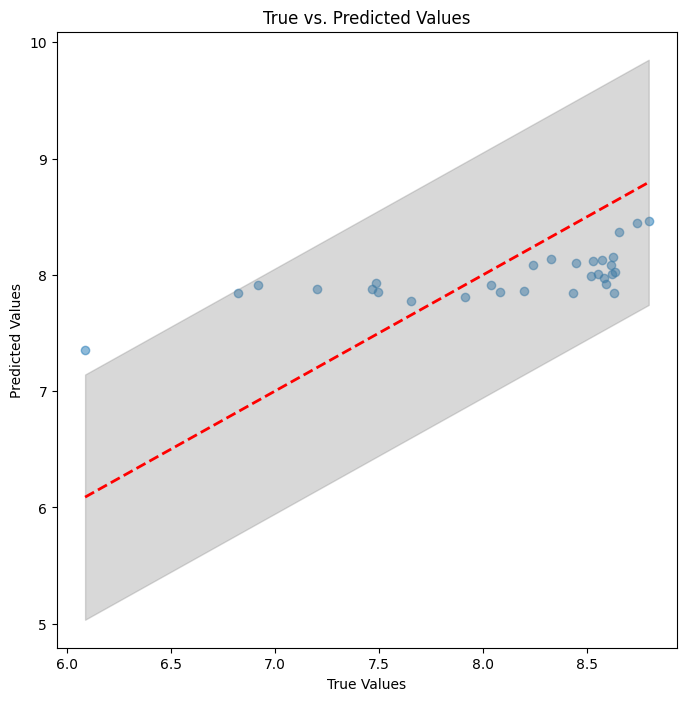

In [143]:
#Plot pred vs real
plot_regression_resulst(y_true=np.log(y_30), y_pred=y_pred)

**Answers / comments / reasoning:**

- **Regressio tree SCORE decision:**
    - It was used the RMSE (Root Mean Squared Error) as a score value to evaluate the model performance and improvement;
    - This metric was selected because we can evaluate the standard deviation of the errors (residuals) between the predicted values and the actual values. A lower RMSE indicates that the model's predictions are closer to the actual values, implying a better fit. 
    -
- **Regressio tree params decision:**
    - At Grid search secction was performed the manual search ovter the ['n_estimators', 'max_depth', 'min_samples_leaf'] model params, to undestand the best range of values to be used at GridSearchCV secction. 
    - n_estimators: a range of 10 to 300 estimators were evaluated to find the score's plato section (RMSE), which represents the point where the n_estimator does not change the score value. This section has been set at 125 to 140 estimators. 
    - max_depth: This restricts the trees from growing too deep and helps prevent overfitting. A range of 3 to 10 was used. It was shown in the grapth that max_depth=5 has the lowest values of RMSE. 
    - min_samples_leaf: The minimum number of samples required to be at a leaf node.  It was shown in the grapth that min_samples_leaf=3 has the lowest values of RMSE.
    -
- **GridSearchCV**
    - Based on the conclusion made from thr manual model paramters search, the GridSearchCV was performed with:


             {'n_estimators':[30, 125, 130, 135, 140],
             'max_depth': [4, 5, 6,],
             'min_samples_leaf': [3, 4, 5],
             'n_jobs':[-1],
             'max_features':["auto",'sqrt','log2']}

    scoring = 'neg_root_mean_squared_error' 
    
- ## **Final model conclusion** 

    root_mean_square_error: 
                        
                        {'max_depth': 6,
                        'max_features': 'sqrt',
                        'min_samples_leaf': 3,
                        'n_estimators': 30,
                        'n_jobs': -1}

        - the validation results after train the model with the GridSearchCV best_params,
        give to us a model that socoring metrics: 

                        {
                        'mse': 0.24,
                        'rmse': 0.49,
                        'rmsle': 0.07,
                        'r2': 0.44,
                        }


        - The rmse of 0.49 indicates that, on average, the model's predictions are 0.49 unist from the original values, indicates a good model performance. The good performance is reinforced by the small rmsle 0.07 value. That the model's predictions are close to the actual values on a logarithmic scale.
        However the r2 of 0.44 indicates that the model explains 44% of the variance over the target vartiable.

        - In this last results plot, a gray region is shown that represents a region with 95% confidence in the results. Most results fall within this region, indicating that predictions are generally accurate and consistent with actual values.

        - A high concentration of data within the confidence interval implies that the model is well-calibrated and has learned the underlying patterns in the data, been an indication of a well-performing model.

        - A high percentage of data within the confidence interval is a sign of the model's robustness, indicating that it can make reliable predictions even when applied to unseen data.



## Part 4 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

## Submission

Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.